In [2]:
!pip install langgraph langchain langchain_community langchain_cohere

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.8/124.8 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 73.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.7/248.7 kB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.3/409.3 kB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.0/209.0 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 81.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 72.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: SQLAlchemy
    Found existing installation: SQLAlchemy 2.0.36
    Uninstalling SQLAlchemy-2.0.36:
      Successfully uninstalled SQLAlchemy-2.0.36
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.15
    Uninstalling langcha

In [134]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langchain_cohere import ChatCohere

In [135]:
llm = ChatCohere(cohere_api_key="4vjIi0h3uZm7G5eHBFn1dV4HLX4rfnVFs37TBsNF")

In [136]:
class State(TypedDict):
    messages: Annotated[list, add_messages]

In [137]:
graph_builder = StateGraph(State)

In [138]:
def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}

In [139]:
def timenow(state: State):
  return {"messages": [("system", "The time now is 64:46")]}

In [140]:
def decide_node(user_input):
  if "time" in user_input["messages"][-1].content:
    return "timenow"
  else:
    return "chatbot"

In [141]:
graph_builder.add_node("chatbot", chatbot)
graph_builder.add_node("timenow", timenow)

In [142]:
graph_builder.add_conditional_edges(START, decide_node)
graph_builder.add_edge("chatbot", END)
graph_builder.add_edge("timenow", END)

In [143]:
graph = graph_builder.compile()

In [144]:
user_input = "What is machine learning?"
events = graph.stream({"messages": [("user", user_input)]}, stream_mode="values")
for event in events:
    print(event["messages"][-1].content)

What is machine learning?
Machine learning (ML) is a branch of computer science and a subfield of artificial intelligence (AI) that focuses on the development of algorithms and statistical models that enable computer systems to learn and improve automatically from experience, without being explicitly programmed. It is a powerful technique that allows machines to acquire knowledge and skills and make predictions or decisions based on data.

In machine learning, algorithms are designed to analyze and identify patterns and insights from large amounts of data, often called "training data." The learning process involves building a model that can make accurate predictions or decisions when exposed to new, unseen data. This is typically achieved using various techniques such as supervised learning, unsupervised learning, and reinforcement learning.

1. Supervised Learning: In this type of ML, the algorithm is trained using labeled data, where input data is paired with the correct output. The 

In [145]:
user_input = "What is the time now?"
events = graph.stream({"messages": [("user", user_input)]}, stream_mode="values")
for event in events:
    print(event["messages"][-1].content)

What is the time now?
The time now is 64:46


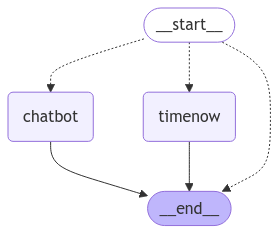

In [146]:
from IPython.display import Image, display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass